CHURN ANALYSIS

#Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading the file

In [2]:
df= pd.read_csv('Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#To get to know about data 
#head() will display 5 rows

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#To get information from data about columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#From above output we saw that column 'TotalCharges' have 'object' Dtype... So we need to inspect it from csv file #We notice that TotalCharge column has some blanks values where tenure column has 0 values #so we need to replace it with 0

#Replacing blanks with '0' as tenure is '0' and no TotalCharges is recorded

In [5]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")

#Changing the datatype from object to float

In [7]:
df["TotalCharges"]=df["TotalCharges"].astype("float")

#Again checking for information(checking whether the Dtype for TotalCharge has changed or not

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Now we are checking for null values in dataset

In [9]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#It gives us values in True AND False, we need the total number of null values if available

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#Above code gives us null values based on columns, but we want total number of null value in entire dataset

In [11]:
df.isnull().sum().sum()

np.int64(0)

In [12]:
print(df.isnull().sum().sum())

0


#We want to know about aggregation functions

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


#Now we are trying to find out if there is any duplicate value available

In [14]:
print(df.duplicated().sum())

0


#We have to check for  duplicated value based on Unique column(i.e. customerID) as well

In [15]:
print(df['customerID'].duplicated().sum())

0


#In dataset we noticed that SeniorCitizen column has 1 or 0....which is not so good to be read so

#Convert 0 & 1 from SeniorCitizen column to yes/no to make it easier to understand

#For that we define a function named convert

In [16]:
def convert(value):
    if value == 1:
        return 'yes'
    else:
        return 'no'

df['SeniorCitizen']=df['SeniorCitizen'].apply(convert)

#Checking whether SeniorCitizen column values have changed or not

In [19]:
df.head(25)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#Countplot to see how many customers has churned out or not

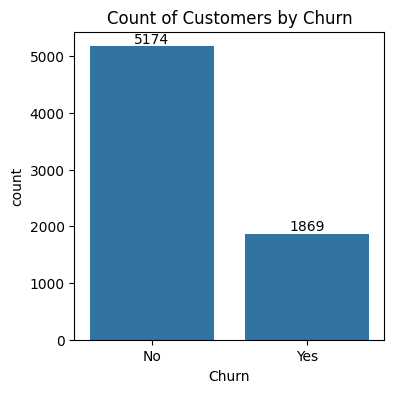

In [21]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

#Now we want to see above values in terms of percentage
#Trying to plot pie chart--to do that we groupby Churn column and find aggregation count

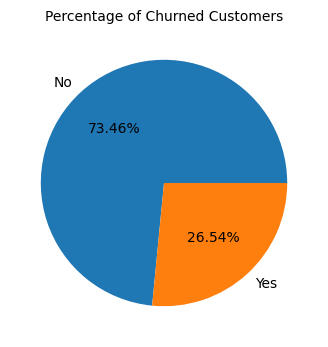

In [22]:
plt.figure(figsize=(4,4))
gb= df.groupby("Churn").agg({'Churn': "count"})
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize=10)
plt.show()

#From the above pie chart, we can conclude that 26.54% of our customers has churned out

#Churn by Gender

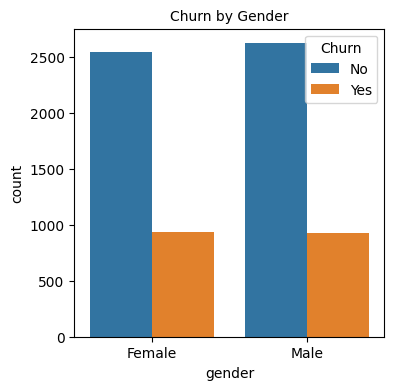

In [23]:
plt.figure(figsize=(4,4))
sns.countplot(x='gender', data=df, hue="Churn")
plt.title("Churn by Gender", fontsize=10)
plt.show()

#From above column chart we see that equal amount of people are churning out not based on gender specific

#Count of Customers by SeniorCitizen

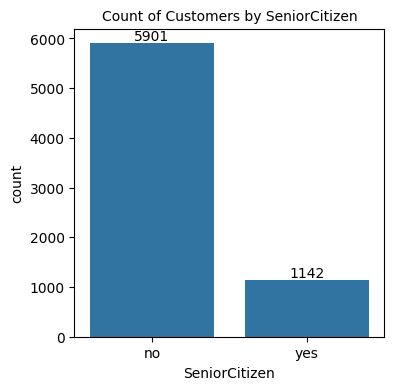

In [24]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='SeniorCitizen', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by SeniorCitizen", fontsize=10)
plt.show()

#From above graph we notice that around 1142 customers are senior citizen

#Churn by SeniorCitizen

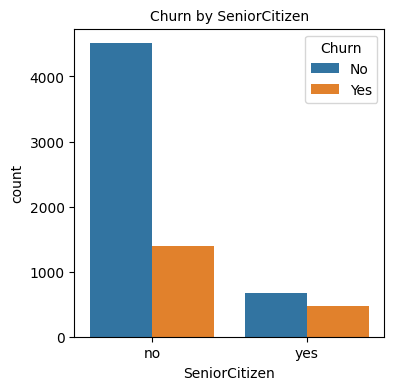

In [25]:
plt.figure(figsize=(4,4))
sns.countplot(x='SeniorCitizen', data=df, hue="Churn")
plt.title("Churn by SeniorCitizen", fontsize=10)
plt.show()

#We are trying to plot this same graph in stack column chart

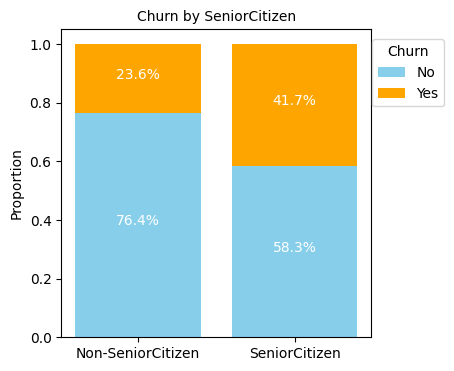

In [26]:
# Step 1: Calculate counts and percentages
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
percentages = counts.div(counts.sum(axis=1), axis=0)

# Use the actual column names instead of 0 and 1
churn_categories = percentages.columns

# Step 2: Plot stacked bar chart
plt.figure(figsize=(4, 4))

# Plot bars for each category (No Churn and Churn)
plt.bar(counts.index, percentages.iloc[:, 0], label=churn_categories[0], color='skyblue')
plt.bar(counts.index, percentages.iloc[:, 1], bottom=percentages.iloc[:, 0], label=churn_categories[1], color='orange')

# Step 3: Add percentage labels
for i in range(len(counts)):
    plt.text(i, percentages.iloc[i, 0] / 2, f'{percentages.iloc[i, 0] * 100:.1f}%', ha='center', color='white')
    plt.text(i, percentages.iloc[i, 0] + percentages.iloc[i, 1] / 2, f'{percentages.iloc[i, 1] * 100:.1f}%', ha='center', color='white')

# Step 4: Title, labels, and legend
plt.title("Churn by SeniorCitizen", fontsize=10)
plt.xticks(ticks=[0, 1], labels=['Non-SeniorCitizen', 'SeniorCitizen'])
plt.ylabel('Proportion')
plt.legend(title='Churn', bbox_to_anchor=(.98,.99))

# Show plot
plt.show()

#Comparitive a greater percentage of people in SeniorCitizen category have churned out

#Ploting histogram - count of customers by tenure--we have used bin size= 72(max)

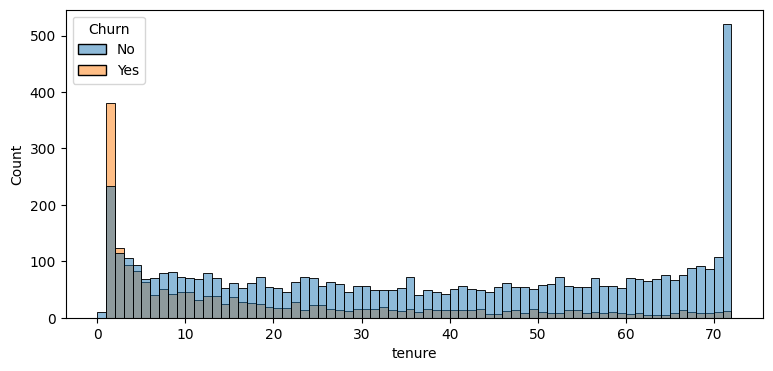

In [27]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure', data=df, bins=72, hue='Churn' )
plt.show()

#From the graph we get to know that people who have used our services for a long time have stayed and people who have used our services for 1 or 2 months have churned out

#Count of Customers by Contract

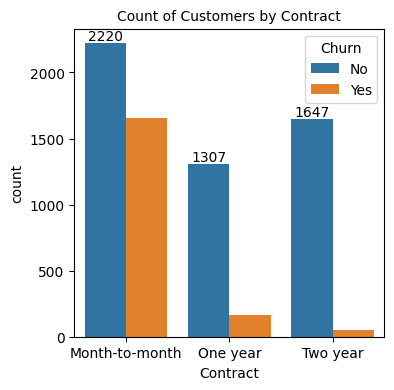

In [28]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='Contract', data=df,hue= 'Churn')
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract", fontsize=10)
plt.show()

#From above graph, we can conclude that most customers with monthly contracts are likely to churned out as compared to others with 1 or 2 years contract

#We are trying to get all columns

In [29]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

#We want to see the characteristics of each services provided by company

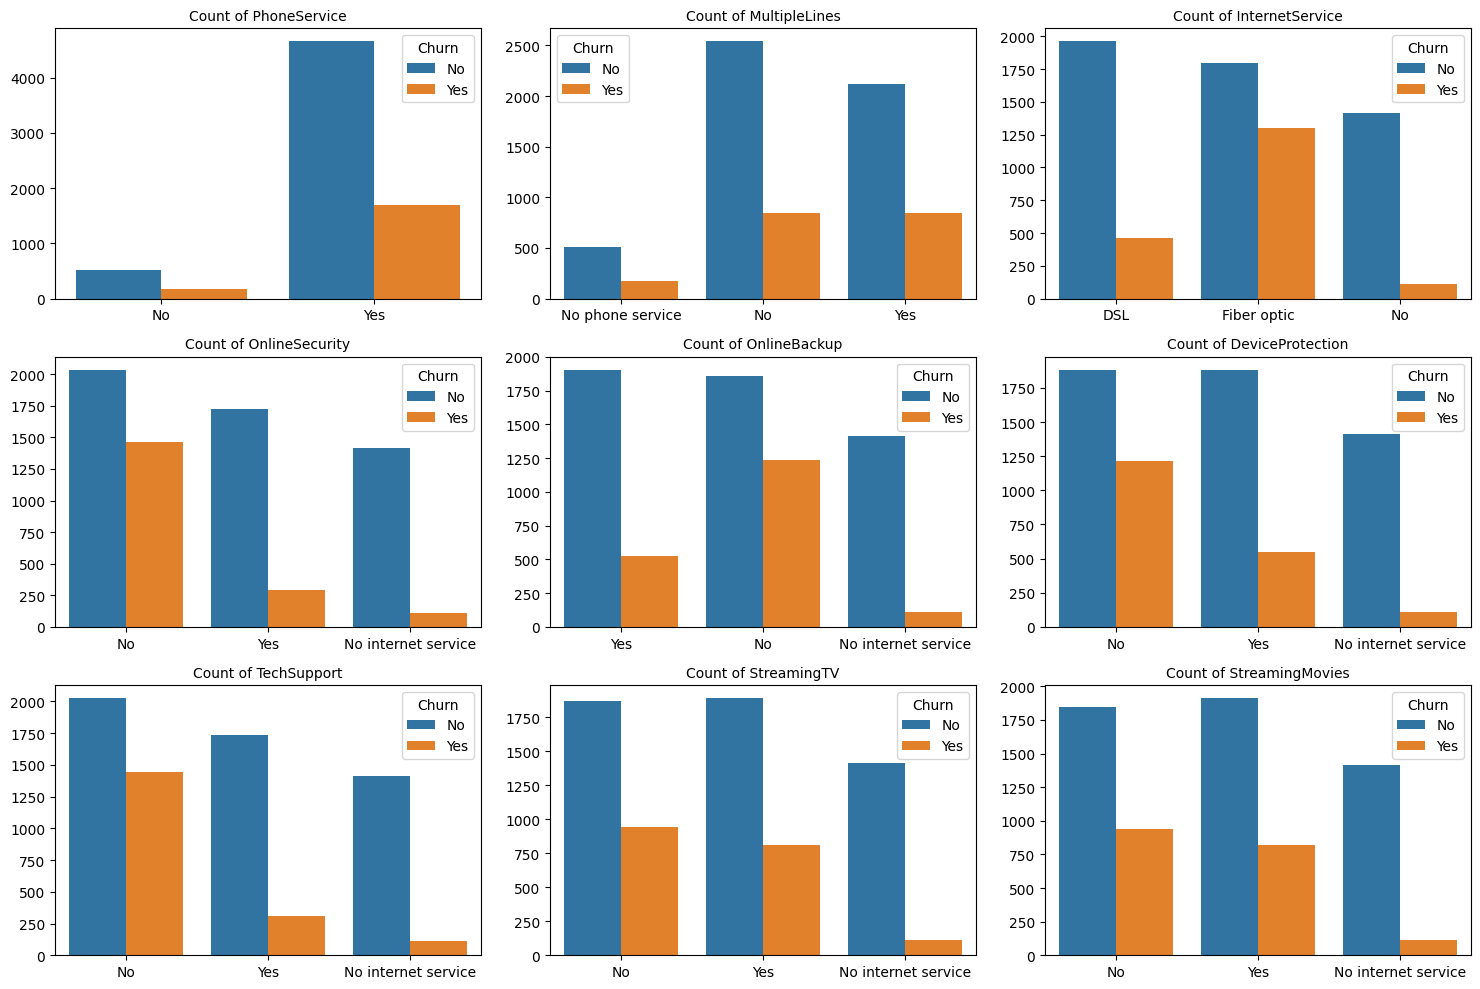

In [30]:
# Columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Step 1: Set up the subplot grid
n_cols = 3  # Number of columns in the subplot grid
n_rows = len(columns) // n_cols + (len(columns) % n_cols > 0)  # Rows based on the number of columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Adjust figsize as needed
axes = axes.flatten()  # Flatten axes array to easily iterate over it

# Step 2: Loop through each column and create a countplot for each
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue='Churn')
    axes[i].set_title(f'Count of {col}', fontsize=10)
    axes[i].set_xlabel('')  # Optional: remove x-axis label for cleaner look
    axes[i].set_ylabel('')  # Optional: remove y-axis label for cleaner look

# Step 3: Remove any empty subplots (if the number of plots is not a perfect grid)
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Step 4: Adjust the layout and display
plt.tight_layout()
plt.show()

#From above plots, we can conclude the following-- InternetService: Customers with fiber optic service show a higher churn rate compared to those using DSL or no internet service.
OnlineSecurity, OnlineBackup, TechSupport: Customers without these services are more likely to churn, while those with these services show lower churn rates.
PhoneService and MultipleLines: While most customers have phone services, churn rates are similar between customers with and without multiple lines.
Overall, lack of internet-related services like security, backup, and tech support appears to be associated with higher churn rates.

#Churned customers by PaymentMethod

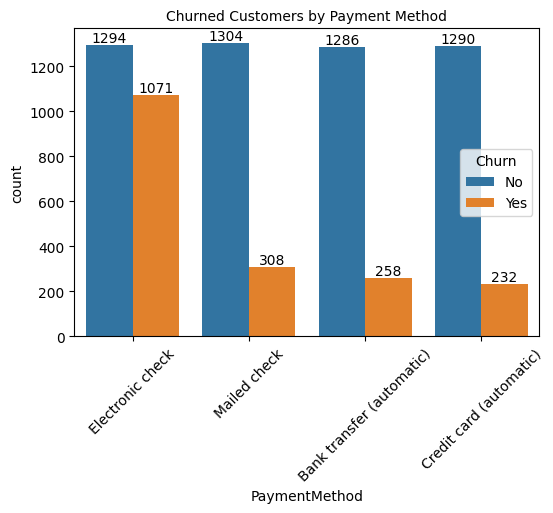

In [31]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='PaymentMethod', data=df,hue= 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.title("Churned Customers by Payment Method", fontsize=10)
plt.show()